<a href="https://colab.research.google.com/github/sightes/COFFETALKS/blob/main/Desafio_latam_Clasificacion_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('default_credit.csv', index_col=None).drop(columns='index')
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


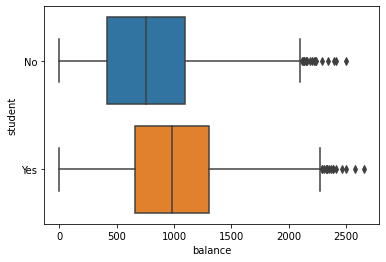

In [2]:
sns.boxplot(data=df,x="balance",y="student")

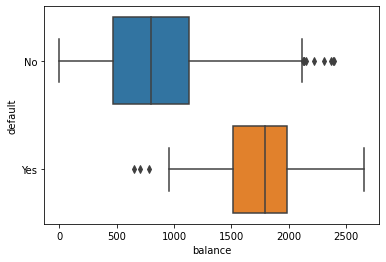

In [3]:
sns.boxplot(data=df,x="balance",y="default")

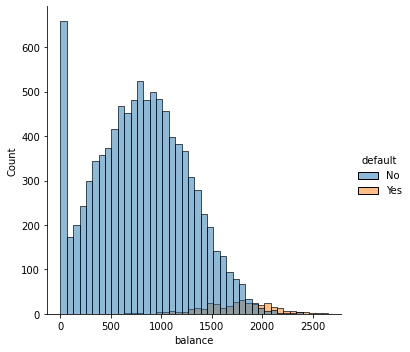

In [4]:
sns.displot(data=df,x="balance",hue="default")

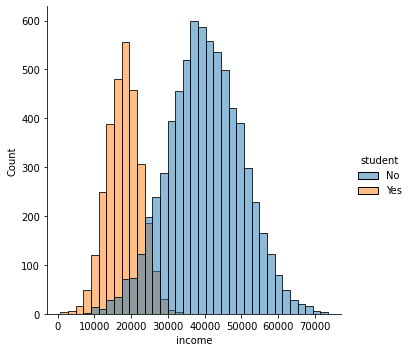

In [5]:
sns.displot(data=df,x="income",hue="student")

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report

In [55]:
valores_estudiante=df.student.unique()
valores_default=df.default.unique()
df['student']=LabelEncoder().fit_transform(df.student)
df['default']=LabelEncoder().fit_transform(df.default)
scaler=StandardScaler()
X=df[['student','balance','income']]
scaler=scaler.fit(X)
X_scaled=scaler.transform(X)
y=df['default']


In [57]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=11238)
LDA=LinearDiscriminantAnalysis().fit(X_train,y_train)
y_pred=LDA.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2895
           1       0.79      0.26      0.39       105

    accuracy                           0.97      3000
   macro avg       0.88      0.63      0.69      3000
weighted avg       0.97      0.97      0.96      3000



In [59]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=11238,sampling_strategy='minority')
X_train_OS,y_train_OS=oversampler.fit_resample(X_train,y_train)
LDA=LinearDiscriminantAnalysis().fit(X_train_OS,y_train_OS)
y_pred=LDA.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91      2895
           1       0.17      0.94      0.29       105

    accuracy                           0.84      3000
   macro avg       0.58      0.89      0.60      3000
weighted avg       0.97      0.84      0.89      3000



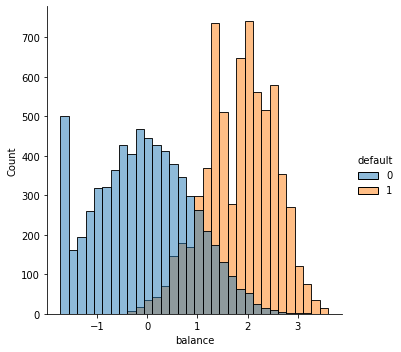

In [67]:
df_OS=pd.DataFrame(X_train_OS,columns=['student','balance','income'])
df_OS['default']=y_train_OS
sns.displot(data=df_OS,x="balance",hue="default")